## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import imageio
from IPython.display import HTML


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

Fixing the seed so that we can reproduce the data if we run it next time.

In [3]:
np.random.seed(0)

## Generate data

n this cell, we generate a synthetic dataset using the make_blobs function from the sklearn.datasets module. This dataset consists of 1000 samples, each with two features, divided into four distinct clusters (centers). The random_state ensures reproducibility of the data. We then print the shape of the data and labels arrays to confirm the dimensions of our dataset.

In [4]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


The data array contains the feature values, while labels holds the corresponding cluster labels. This synthetic data will be used for training and evaluating a neural network model in the following sections. Here is the plot of the data.

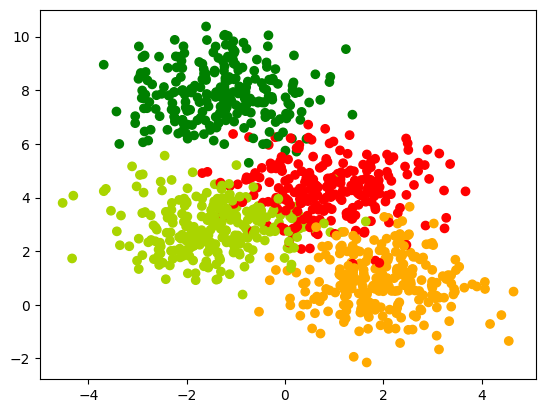

In [5]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In this cell, we modify the original labels to create a binary classification problem. The labels_orig array, which contains the cluster labels from the previous step, is updated using the np.mod() function to take the remainder when each label is divided by 2. This operation effectively converts the labels into a binary format (0 or 1), grouping the data into two categories.

In [6]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

You can see that now we have two classes

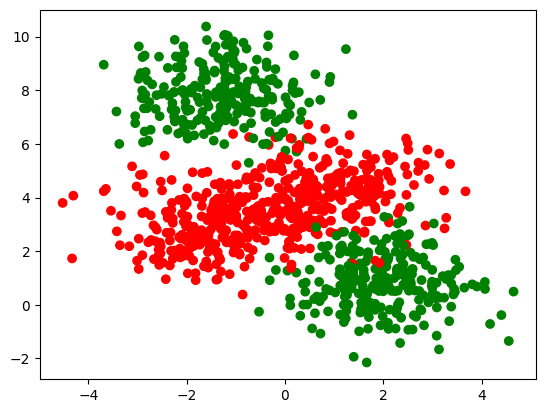

In [7]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In this cell, we split the dataset into training and validation sets using the train_test_split function from sklearn.model_selection. The data and labels arrays are divided such that the label distribution is preserved across the splits by setting stratify=labels. This ensures that both the training and validation sets contain the same proportion of each label class. We also set the random_state to ensure the split is reproducible.

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


## Our First FF Network

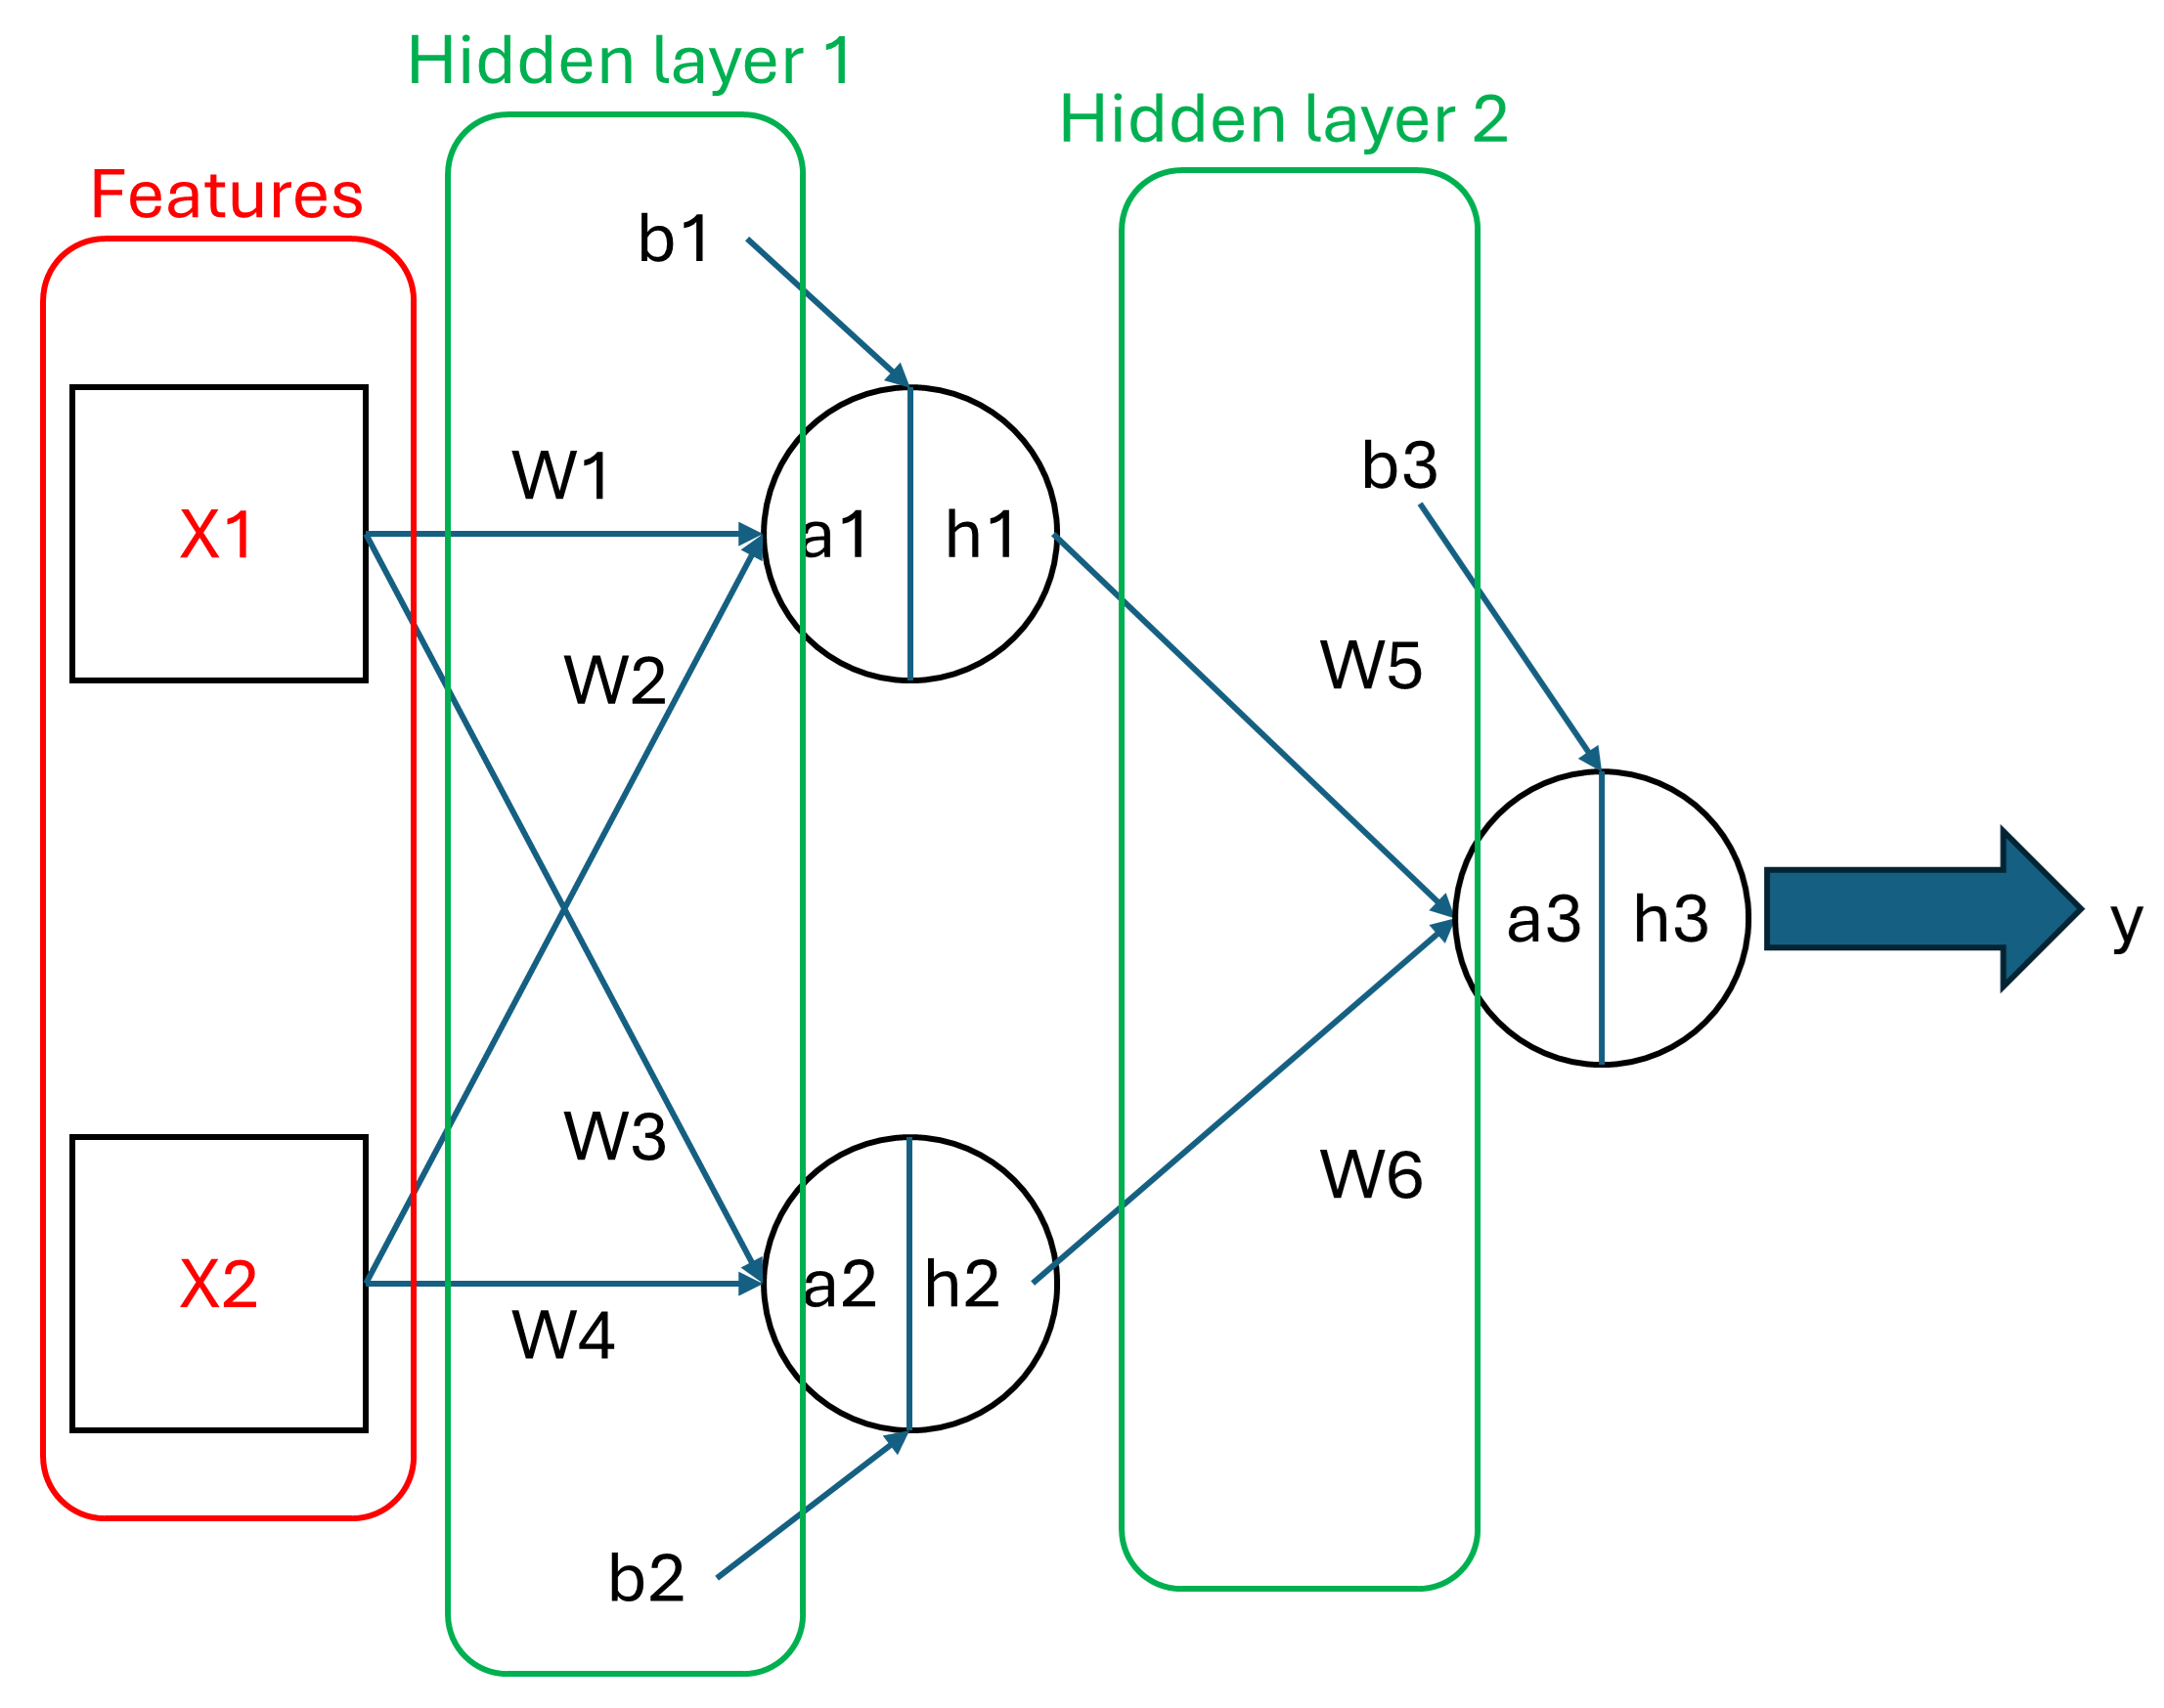

### Initialization:
The network is initialized with 6 random weights ($w_1, w_2, w_3, w_4, w_5, w_6$) and 3 biases ($b_1, b_2, b_3$). These parameters define the connections between the layers of the network.

- $w_1, w_2$: Weights for the first layer (input to hidden neuron 1).
- $w_3, w_4$: Weights for the second layer (input to hidden neuron 2).
- $w_5, w_6$: Weights for the third layer (hidden neurons to output).
- $b_1, b_2, b_3$: Bias terms for each layer.

### Forward Pass:
In the forward pass, the network computes the output layer $h_3$ using the following equations:

1. **Input to hidden layer 1:**
$$
a_1 = w_1 \cdot x_1 + w_2 \cdot x_2 + b_1
$$
$$
h_1 = \sigma(a_1)
$$
where $\sigma$ is the sigmoid activation function,
$$
\sigma(x) = \frac{1}{1 + e^{-x}}.
$$

2. **Input to hidden layer 2:**
$$
a_2 = w_3 \cdot x_1 + w_4 \cdot x_2 + b_2
$$
$$
h_2 = \sigma(a_2)
$$

3. **Hidden layer to output:**
$$
a_3 = w_5 \cdot h_1 + w_6 \cdot h_2 + b_3
$$
$$
h_3 = \sigma(a_3)
$$
where $h_3$ is the final output of the network.

### Gradient Computation (`grad` function):
The gradient of the loss with respect to each parameter is computed in the `grad` function. The gradient of the weight $w_1$ is calculated using the chain rule:
$$
\frac{\partial L}{\partial w_1} = (h_3 - y) \cdot h_3 \cdot (1 - h_3) \cdot w_5 \cdot h_1 \cdot (1 - h_1) \cdot x_1
$$
This computes how much $w_1$ should be adjusted to minimize the error $L$.

### Training (`fit` function):
During training, the weights are updated using gradient descent. For each epoch, the weights are updated based on the gradient of the loss:
$$
w_1 \leftarrow w_1 - \eta \cdot \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial w_1}
$$
where $\eta$ is the learning rate and $m$ is the number of samples in the dataset.

The `fit` function also optionally displays the loss curve and weight updates during training.

### Prediction:
The `predict` function computes the output for each input $x \in X$ using the forward pass equations described above.

---

### Summary of the Key Equations:
1. **Forward Pass:**
$$
a_1 = w_1 \cdot x_1 + w_2 \cdot x_2 + b_1, \quad h_1 = \sigma(a_1)
$$
$$
a_2 = w_3 \cdot x_1 + w_4 \cdot x_2 + b_2, \quad h_2 = \sigma(a_2)
$$
$$
a_3 = w_5 \cdot h_1 + w_6 \cdot h_2 + b_3, \quad h_3 = \sigma(a_3)
$$

2. **Gradient for Weight Update:**
$$
\frac{\partial L}{\partial w_1} = (h_3 - y) \cdot h_3 \cdot (1 - h_3) \cdot w_5 \cdot h_1 \cdot (1 - h_1) \cdot x_1
$$

3. **Weight Update (Gradient Descent):**
$$
w_1 \leftarrow w_1 - \eta \cdot \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial w_1}
$$


In [11]:
class FFNetwork:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1


  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):

    if display_loss:
      loss = {}
      w1 = {}

    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1

      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m

      if display_loss:
        w1[i] = self.w1
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)


    if display_loss:
      plt.tight_layout()

      plt.subplot(2,1,1)
      plt.plot(np.array(list(w1.values())))
      plt.xlabel('Epochs')
      plt.ylabel('W1')

      plt.subplot(2,1,2)
      plt.plot(np.array(list(loss.values())))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')

      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In this cell, we initialize a new instance of the FFNetwork class and train it using the fit method. The training process involves adjusting the network's weights using gradient descent over 500 epochs. The learning rate is set to 1, and the loss is displayed during training for each epoch.

<ipython-input-11-5af57ade1bed>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/500 [00:00<?, ?epoch/s]

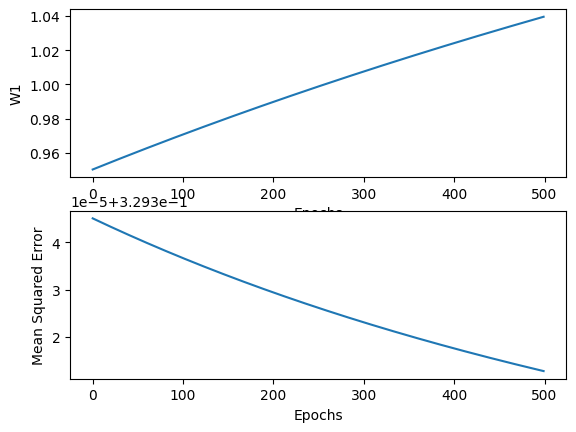

In [12]:
ffn = FFNetwork()
ffn.fit(X_train, Y_train, epochs=500, learning_rate=1, display_loss=True)

- X_train and Y_train: These are the training data and corresponding labels.
- epochs=500: The network will train for 500 iterations (epochs).
- learning_rate=1: The learning rate for weight updates during training.
- display_loss=True: This option enables the visualization of the loss - (mean squared error) and weight updates during the training process.

The model will adjust its weights iteratively to minimize the loss, and the loss curves and weight updates will be shown for each epoch.



### Initialization:
The network is initialized with 6 random weights ($w_1, w_2, w_3, w_4, w_5, w_6$) and 3 biases ($b_1, b_2, b_3$). These parameters define the connections between the layers of the network.

- $w_1, w_2$: Weights for the first layer (input to hidden neuron 1).
- $w_3, w_4$: Weights for the second layer (input to hidden neuron 2).
- $w_5, w_6$: Weights for the third layer (hidden neurons to output).
- $b_1, b_2, b_3$: Bias terms for each layer.

### Forward Pass:
In the forward pass, the network computes the output layer $h_3$ using the following equations:

1. **Input to hidden layer 1:**
$$
a_1 = w_1 \cdot x_1 + w_2 \cdot x_2 + b_1
$$
$$
h_1 = \sigma(a_1)
$$
where $\sigma$ is the sigmoid activation function,
$$
\sigma(x) = \frac{1}{1 + e^{-x}}.
$$

2. **Input to hidden layer 2:**
$$
a_2 = w_3 \cdot x_1 + w_4 \cdot x_2 + b_2
$$
$$
h_2 = \sigma(a_2)
$$

3. **Hidden layer to output:**
$$
a_3 = w_5 \cdot h_1 + w_6 \cdot h_2 + b_3
$$
$$
h_3 = \sigma(a_3)
$$
where $h_3$ is the final output of the network.

### Gradient Computation (`grad` function):
The gradient of the loss with respect to each parameter is computed in the `grad` function. The gradient of the weight $w_1$ is calculated using the chain rule:
$$
\frac{\partial L}{\partial w_1} = (h_3 - y) \cdot h_3 \cdot (1 - h_3) \cdot w_5 \cdot h_1 \cdot (1 - h_1) \cdot x_1
$$
This computes how much $w_1$ should be adjusted to minimize the error $L$.

### Training (`fit` function):
During training, the weights are updated using gradient descent. For each epoch, the weights are updated based on the gradient of the loss:
$$
w_1 \leftarrow w_1 - \eta \cdot \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial w_1}
$$
where $\eta$ is the learning rate and $m$ is the number of samples in the dataset.

The `fit` function also optionally displays the loss curve and weight updates during training.

### Prediction:
The `predict` function computes the output for each input $x \in X$ using the forward pass equations described above.

---

### Summary of the Key Equations:
1. **Forward Pass:**
$$
a_1 = w_1 \cdot x_1 + w_2 \cdot x_2 + b_1, \quad h_1 = \sigma(a_1)
$$
$$
a_2 = w_3 \cdot x_1 + w_4 \cdot x_2 + b_2, \quad h_2 = \sigma(a_2)
$$
$$
a_3 = w_5 \cdot h_1 + w_6 \cdot h_2 + b_3, \quad h_3 = \sigma(a_3)
$$

2. **Gradient for Weight Update:**
$$
\frac{\partial L}{\partial w_1} = (h_3 - y) \cdot h_3 \cdot (1 - h_3) \cdot w_5 \cdot h_1 \cdot (1 - h_1) \cdot x_1
$$

3. **Weight Update (Gradient Descent):**
$$
w_1 \leftarrow w_1 - \eta \cdot \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial w_1}
$$

---

### Differences Between the Two Networks:

1. **Initialization:**
   - **First FFNetwork:** Weights are randomly initialized without an explicit random seed, so the initialization can vary between runs.
   - **Second FFNetwork:** Weights are initialized with a random seed (`np.random.seed(0)`), ensuring reproducibility of the initial weights.

2. **Gradient Calculation:**
   - **First FFNetwork:** The `grad` function only computes the gradient for `w_1` and does not update all weights and biases, leading to incomplete backpropagation.
   - **Second FFNetwork:** The `grad` function computes gradients for all weights and biases (`w_1` through `w_6`, and `b_1` through `b_3`), enabling proper training.

3. **Training:**
   - **First FFNetwork:** The `fit` function updates only `w_1`, preventing the network from properly learning during training.
   - **Second FFNetwork:** The `fit` function updates all weights and biases based on their respective gradients, allowing the network to learn and improve the model during training.

4. **Prediction:**
   - **First FFNetwork:** Only provides the final output `h_3` in the `predict` function.
   - **Second FFNetwork:** Provides additional functions (`predict_h1`, `predict_h2`, `predict_h3`) to track the activations of hidden layers 1, 2, and the output layer, offering a more detailed insight into the model's behavior.

5. **Loss Tracking and Visualization:**
   - **First FFNetwork:** Loss tracking is set up but not functional due to incomplete gradient calculation.
   - **Second FFNetwork:** Proper loss tracking and visualization using `mean_squared_error` are implemented, allowing monitoring of model performance during training.

6. **Weight Updates and Learning Rate:**
   - **First FFNetwork:** Incomplete gradient calculations lead to non-functional weight updates.
   - **Second FFNetwork:** Full weight updates based on calculated gradients using gradient descent, ensuring proper learning.


In [13]:
class FirstFFNetwork:

  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)

    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)

    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)


  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False, display_weight=False):

    # initialise w, b
    if initialise:
      np.random.seed(0)
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0

    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)

      if display_weight:
        weight_matrix = np.array([[0, self.b3, self.w5, self.w6, 0, 0], [self.b1, self.w1, self.w2, self.b2, self.w3, self.w4]])
        weight_matrices.append(weight_matrix)

    if display_loss:
      plt.plot(np.array(list(loss.values())))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)

  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)

  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)

<ipython-input-13-fa59c4fa0bd5>:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/2000 [00:00<?, ?epoch/s]

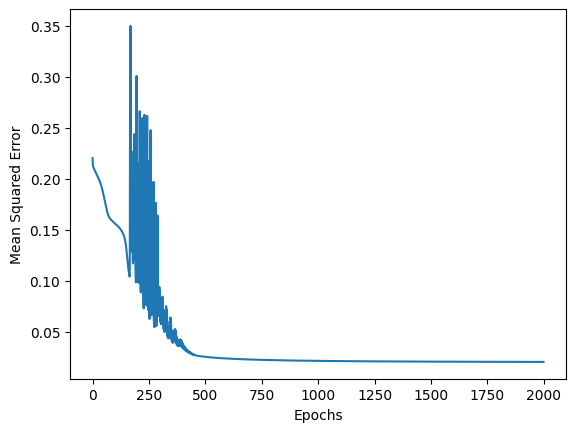

In [14]:
weight_matrices = []
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=5, display_loss=True, display_weight=True)

### Code Explanation:

This code defines a set of functions to visualize the decision boundaries of a neural network, particularly for a 2D dataset, using contour plots and scatter plots. The goal is to plot the activations of different hidden layers of the neural network (`h1`, `h2`, and `h3`) to better understand the model’s behavior. Here's a breakdown of each function:

---

### **1. `make_meshgrid(x, y, h=.2)`**:
This function generates a grid of points in 2D space to plot the decision boundaries or activations.

- **Inputs:**
  - `x` and `y`: 1D arrays representing the feature space (e.g., X and Y data points).
  - `h`: Step size for the grid (default is 0.2).
  
- **Process:**
  - The `x_min` and `x_max` are set with an additional buffer (`0.5` units) to avoid cutting off points at the edges.
  - Similarly, `y_min` and `y_max` are calculated with a buffer to extend the range.
  - `np.meshgrid()` creates a 2D grid (`xx` and `yy`) covering the entire range defined by `x_min`, `x_max`, `y_min`, and `y_max`.

- **Output:**
  - `xx`, `yy`: A 2D mesh grid, which will be used for plotting.

---

### **2. `plot_contours(ax, predict, xx, yy, **params)`**:
This function draws filled contour plots, representing decision boundaries or the activations of neurons.

- **Inputs:**
  - `ax`: The axes object on which to plot.
  - `predict`: A function used to predict the output for each point in the grid (this will be the activation for each hidden layer).
  - `xx`, `yy`: 2D arrays of the mesh grid generated by `make_meshgrid()`.
  - `**params`: Additional parameters for the `contourf` plot, such as `cmap`, `alpha`, etc.
  
- **Process:**
  - `predict(np.c_[xx.ravel(), yy.ravel()])` flattens the `xx` and `yy` arrays and stacks them as pairs of coordinates to predict values (activation for each point).
  - The predictions (`Z`) are reshaped to match the shape of the grid (`xx.shape`).
  - `ax.contourf()` creates the filled contour plot based on the predictions and additional parameters.

- **Output:**
  - The contour plot is created on the provided axes (`ax`).

---

### **3. `plot_boundary()`**:
This function is the main driver for plotting the decision boundaries for each hidden layer (`h1`, `h2`, `h3`).

- **Process:**
  - `make_meshgrid()` generates the mesh grid for the 2D input space (`X_train[:, 0]`, `X_train[:, 1]`).
  - `predict_functions` is a list of functions corresponding to the predictions for `h1`, `h2`, and `h3` (activations of the hidden layers).
  - A loop iterates through each hidden layer (`h1`, `h2`, `h3`), creating a separate plot for each.
  - `plot_contours()` is called to plot the filled contour maps of each hidden layer’s activation.
  - `ax.scatter()` plots the training data (`X_train`, `Y_train`) as scatter points over the contour plots.
  - The axes limits and labels are adjusted for each plot, and the title reflects the hidden layer (`h1`, `h2`, or `h3`).

- **Output:**
  - Three plots are created, each showing the activations for `h1`, `h2`, and `h3`.

---

### **4. `plot_boundary()`**:
This function is called to visualize the decision boundaries of the neural network. It produces a grid of contour plots for each of the hidden layers (`h1`, `h2`, `h3`).

---

---

### **Example Plot Output:**

The function will generate three contour plots, each corresponding to one of the hidden layers:

1. **First Plot (`h1`)**: Visualizes how the activation of the first hidden layer changes with respect to the input space.
2. **Second Plot (`h2`)**: Visualizes the activation of the second hidden layer.
3. **Third Plot (`h3`)**: Visualizes the final output layer's activation.

These plots help to understand how the neural network's hidden layers transform the input space and contribute to the decision-making process.


True

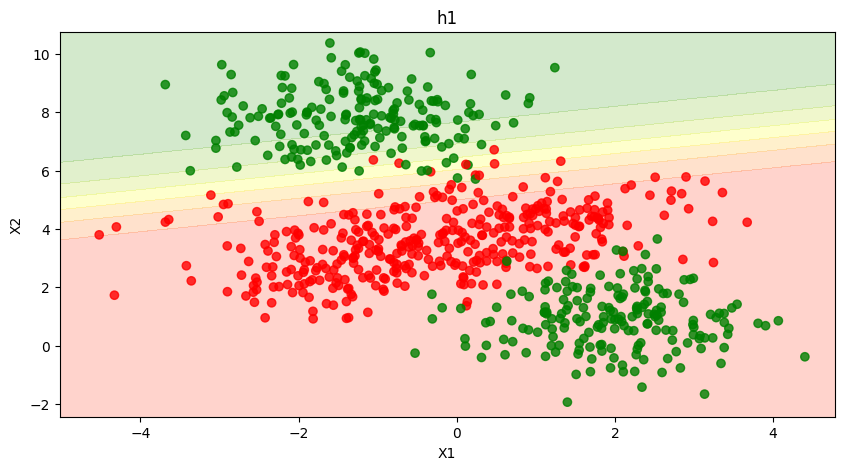

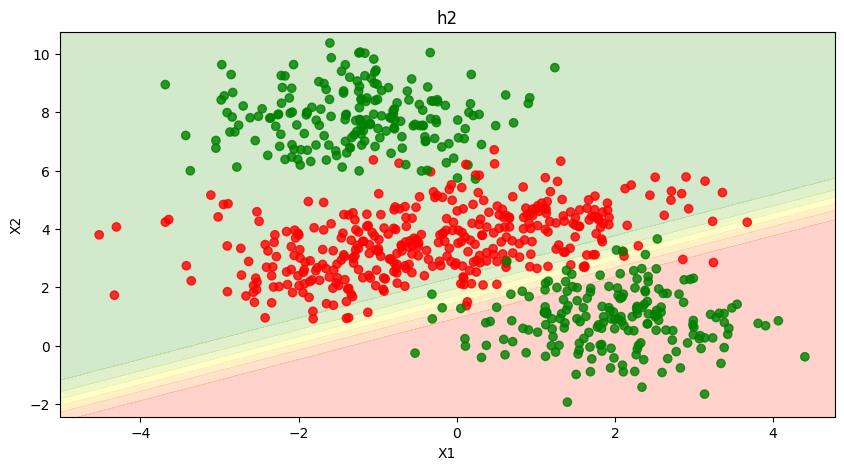

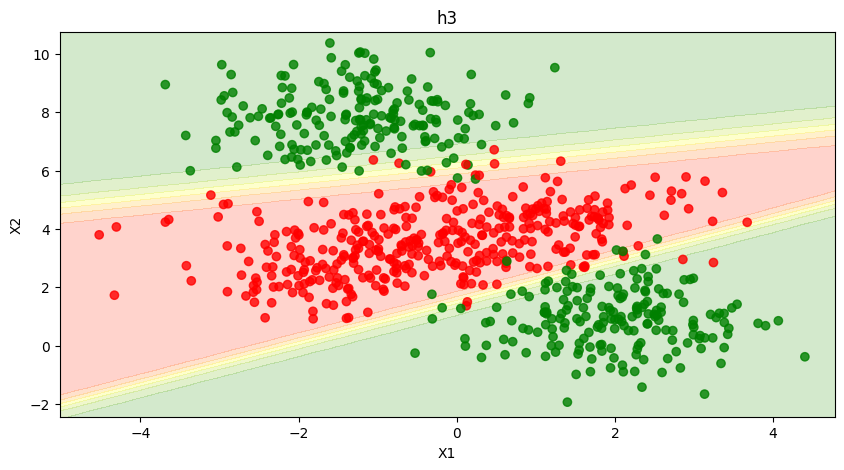

In [15]:
def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, predict, xx, yy, **params):
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_boundary():
    xx, yy = make_meshgrid(X_train[:,0], X_train[:,1])
    predict_functions = [ffn.predict_h1, ffn.predict_h2, ffn.predict_h3]

    for i in range(3):

      fig, ax = plt.subplots(figsize=(10,5))

      plot_contours(ax, predict_functions[i], xx, yy,
                    cmap=my_cmap, alpha=0.2)
      ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap, alpha=0.8)
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xlabel('X1')
      ax.set_ylabel('X2')
      ax.set_title("h"+str(i+1))

    return True

plot_boundary()

### Predicting the Output:
In this section, we predict the output for both the training and validation datasets using the trained neural network (`ffn`).

1. **Training Predictions:**
   - `Y_pred_train`: This variable stores the predicted output for the training dataset (`X_train`).
   - `Y_pred_binarised_train`: Since the output of the network is a continuous value between 0 and 1, we binarize it by applying a threshold of 0.5. If the predicted value is greater than or equal to 0.5, it's classified as 1, otherwise 0.

2. **Validation Predictions:**
   - `Y_pred_val`: This variable stores the predicted output for the validation dataset (`X_val`).
   - `Y_pred_binarised_val`: Similar to the training set, we binarize the predicted values for the validation dataset.

### Calculating Accuracy:
We compute the accuracy of the predictions by comparing the predicted and actual labels using the `accuracy_score` function from scikit-learn.

1. **Training Accuracy:**
   - `accuracy_train`: This is the accuracy score for the training dataset. It is computed by comparing the binarized predicted values (`Y_pred_binarised_train`) with the actual training labels (`Y_train`).

2. **Validation Accuracy:**
   - `accuracy_val`: This is the accuracy score for the validation dataset. It is computed by comparing the binarized predicted values (`Y_pred_binarised_val`) with the actual validation labels (`Y_val`).

### Printing Accuracy:
Finally, the training and validation accuracy scores are printed, rounded to two decimal places.



In [16]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


### Visualizing Training Predictions:

In this code snippet, we visualize the predictions made on the training data (`X_train`) using a scatter plot.

1. **Plotting the Training Data:**
   - `X_train[:, 0]`: This is the first feature (column) of the training data, which corresponds to the x-coordinate of each point in the scatter plot.
   - `X_train[:, 1]`: This is the second feature (column) of the training data, which corresponds to the y-coordinate of each point in the scatter plot.

2. **Coloring the Points Based on Predictions:**
   - `c=Y_pred_binarised_train`: The color of each point in the plot is determined by the predicted class label (`Y_pred_binarised_train`). This will use different colors for predicted values of 0 and 1, as defined in the colormap (`my_cmap`).

3. **Adjusting the Size of the Points:**
   - `s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2)`: The size of each point is adjusted based on how much the predicted value (`Y_pred_binarised_train`) differs from the actual label (`Y_train`). The larger the difference, the bigger the point, which helps to visually highlight incorrect predictions. A small constant value (`+0.2`) is added to ensure the points have a minimum size.

4. **Displaying the Plot:**
   - `plt.show()`: This command displays the scatter plot, allowing us to visually inspect the relationship between the training data, predicted values, and actual labels.

The resulting plot provides a visual comparison of how well the model's predictions align with the actual labels in the training data, with the size of the points indicating the magnitude of prediction errors.


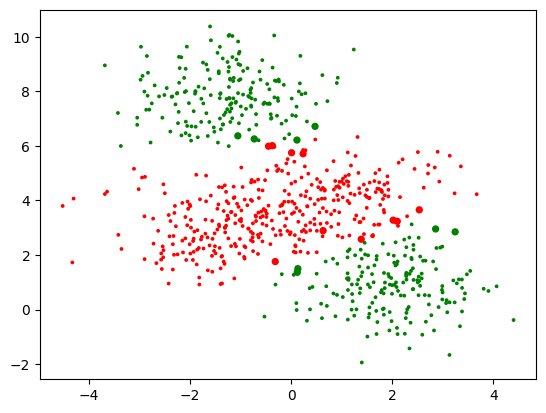

In [17]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()